In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# EDA

In [2]:
# loading the data 

data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print("The shape of data : ",data.shape)
print("The info. of data :", data.info())
print("The statistical values of data :", data.describe())

The shape of data :  (1338, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
The info. of data : None
The statistical values of data :              index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121

In [5]:
print("Null values :" ,data.isnull().sum())
print("Checking duplicate values :", data.duplicated().sum())

Null values : index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Checking duplicate values : 0


In [6]:
print("After dropping the index column :", data.drop(columns=["index"],inplace=True))
print("Shape of data :", data.shape)

After dropping the index column : None
Shape of data : (1338, 7)


In [7]:
numerical_columns = data.select_dtypes(include=["int64","float64"])
print("Numerical columns = ",numerical_columns )

categorical_columns = data.select_dtypes(include = ["object"])
print("Categorical columns = ",categorical_columns)

Numerical columns =        age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   18  31.920         0   2205.98080
1335   18  36.850         0   1629.83350
1336   21  25.800         0   2007.94500
1337   61  29.070         0  29141.36030

[1338 rows x 4 columns]
Categorical columns =           sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]


In [8]:
print("Uniques value of sex columns = ",categorical_columns["sex"].unique())
print("Uniques value of smoker columns = ",categorical_columns["smoker"].unique())
print("Uniques value of region columns = ",categorical_columns["region"].unique())

Uniques value of sex columns =  ['female' 'male']
Uniques value of smoker columns =  ['yes' 'no']
Uniques value of region columns =  ['southwest' 'southeast' 'northwest' 'northeast']


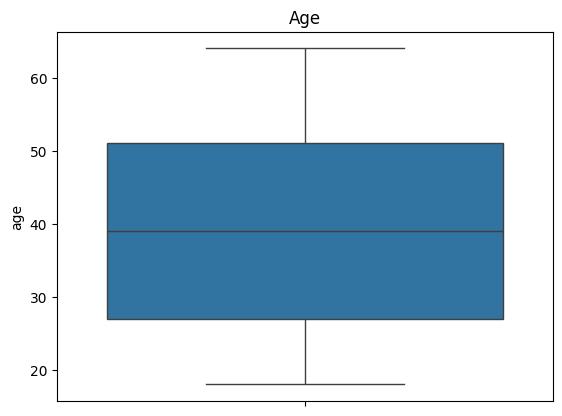

In [9]:
# checking outlier in numerical columns 

# 1. age 
plt.title("Age")
sns.boxplot(data["age"])
plt.show()

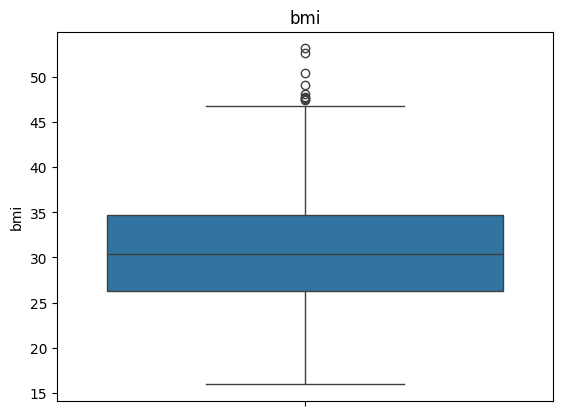

In [10]:
plt.title("bmi")
sns.boxplot(data["bmi"])
plt.show()

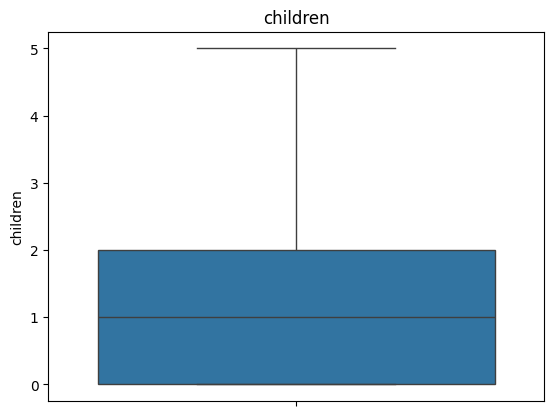

In [11]:
plt.title("children")
sns.boxplot(data["children"])
plt.show()

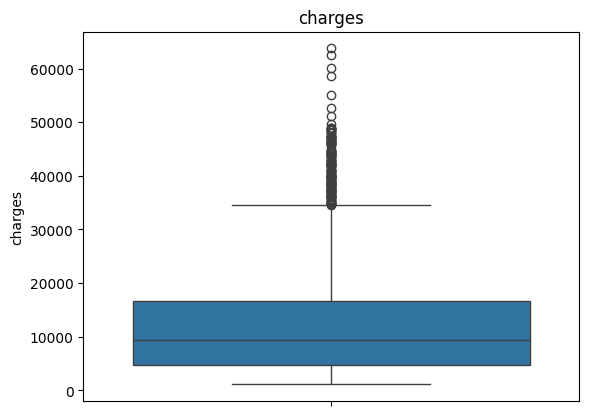

In [12]:
plt.title("charges")
sns.boxplot(data["charges"])
plt.show()

# FEATURE ENGINEERING

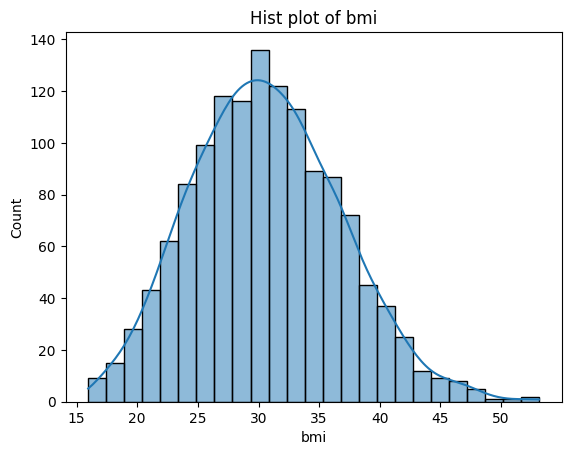

In [13]:
# removing outliers from numerical columns 

# bmi ......
plt.title("Hist plot of bmi")
sns.histplot(numerical_columns["bmi"],kde = True)
plt.show()

In [14]:
from scipy.stats import zscore 

In [15]:
numerical_columns["zscore_bmi"] = zscore(numerical_columns["bmi"])
print(numerical_columns)

threshold = 3

numerical_columns["outliers"] =  abs(numerical_columns["zscore_bmi"]) > threshold
print(numerical_columns)


numerical = numerical_columns[~numerical_columns["outliers"]]
print(numerical)

numerical.drop(columns = ["zscore_bmi","outliers"],inplace=True)
print(numerical)




      age     bmi  children      charges  zscore_bmi
0      19  27.900         0  16884.92400   -0.453320
1      18  33.770         1   1725.55230    0.509621
2      28  33.000         3   4449.46200    0.383307
3      33  22.705         0  21984.47061   -1.305531
4      32  28.880         0   3866.85520   -0.292556
...   ...     ...       ...          ...         ...
1333   50  30.970         3  10600.54830    0.050297
1334   18  31.920         0   2205.98080    0.206139
1335   18  36.850         0   1629.83350    1.014878
1336   21  25.800         0   2007.94500   -0.797813
1337   61  29.070         0  29141.36030   -0.261388

[1338 rows x 5 columns]
      age     bmi  children      charges  zscore_bmi  outliers
0      19  27.900         0  16884.92400   -0.453320     False
1      18  33.770         1   1725.55230    0.509621     False
2      28  33.000         3   4449.46200    0.383307     False
3      33  22.705         0  21984.47061   -1.305531     False
4      32  28.880       

C:\Users\HP\AppData\Local\Temp\ipykernel_25452\736663909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical.drop(columns = ["zscore_bmi","outliers"],inplace=True)


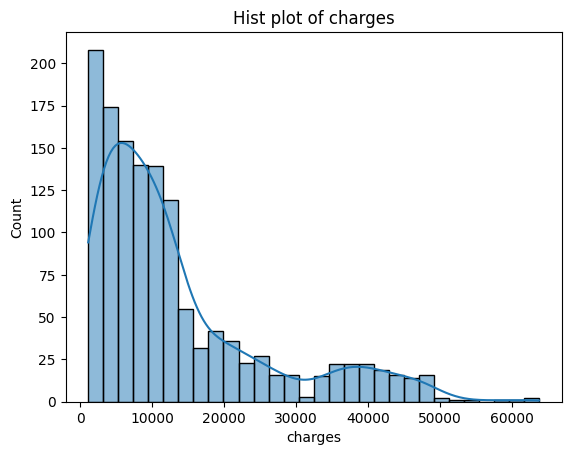

In [16]:
# charges......

plt.title("Hist plot of charges")
sns.histplot(numerical_columns["charges"],kde = True)
plt.show()

In [17]:
q1 = numerical["charges"].quantile(0.25)
q3 = numerical["charges"].quantile(0.75)

iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

numerical["outliers"] = (numerical["charges"] < lower_bound ) | (numerical["charges"] > upper_bound)
print(numerical)

numerical = numerical[numerical["outliers"]==False]

numerical.drop(columns=["outliers"],inplace = True)
print("After removing outliers....", numerical)


      age     bmi  children      charges  outliers
0      19  27.900         0  16884.92400     False
1      18  33.770         1   1725.55230     False
2      28  33.000         3   4449.46200     False
3      33  22.705         0  21984.47061     False
4      32  28.880         0   3866.85520     False
...   ...     ...       ...          ...       ...
1333   50  30.970         3  10600.54830     False
1334   18  31.920         0   2205.98080     False
1335   18  36.850         0   1629.83350     False
1336   21  25.800         0   2007.94500     False
1337   61  29.070         0  29141.36030     False

[1334 rows x 5 columns]
After removing outliers....       age     bmi  children      charges
0      19  27.900         0  16884.92400
1      18  33.770         1   1725.55230
2      28  33.000         3   4449.46200
3      33  22.705         0  21984.47061
4      32  28.880         0   3866.85520
...   ...     ...       ...          ...
1333   50  30.970         3  10600.54830
1334   

C:\Users\HP\AppData\Local\Temp\ipykernel_25452\449251510.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["outliers"] = (numerical["charges"] < lower_bound ) | (numerical["charges"] > upper_bound)


In [18]:
categorical_columns

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [19]:
from sklearn.preprocessing import LabelEncoder

In [46]:
#encoder_sex = LabelEncoder()
#encoder_smoker = LabelEncoder()
#encoder_region = LabelEncoder()

#categorical_columns["sex"] = encoder_sex.fit_transform(categorical_columns["sex"])
#categorical_columns["smoker"] = encoder_smoker.fit_transform(categorical_columns["smoker"])
#categorical_columns["region"] = encoder_region.fit_transform(categorical_columns["region"])

#print("After Encoding technique.....", categorical_columns)

In [48]:
import pickle 

# Saving the encoders
#with open("encoder_sex.pkl", "wb") as f:
   # pickle.dump(encoder_sex, f)

#with open("encoder_smoker.pkl", "wb") as f:
    #pickle.dump(encoder_smoker, f)

#with open("encoder_region.pkl", "wb") as f:
    #pickle.dump(encoder_region, f)

#print("Encoders saved successfully.")

In [49]:
# Create and fit encoders
encoder_sex = LabelEncoder()
encoder_sex.fit(["male", "female"])

encoder_smoker = LabelEncoder()
encoder_smoker.fit(["yes", "no"])

encoder_region = LabelEncoder()
encoder_region.fit(["southwest", "southeast", "northwest", "northeast"])

# Save the encoders
with open("encoder_sex.pkl", "wb") as file:
    pickle.dump(encoder_sex, file)

with open("encoder_smoker.pkl", "wb") as file:
    pickle.dump(encoder_smoker, file)

with open("encoder_region.pkl", "wb") as file:
    pickle.dump(encoder_region, file)

print("✅ Encoders saved successfully!")

✅ Encoders saved successfully!


# MATCHING THE ROWS IN BOTH NUMERICAL AND CATEGORICAL DATA

In [50]:
print("Numerical Shape:", numerical.shape)
print("Categorical Shape:", categorical_columns.shape)


Numerical Shape: (1196, 4)
Categorical Shape: (1196, 3)


In [51]:
missing_indices = set(categorical_columns.index) - set(numerical.index)
print("Missing Rows in Numerical:", missing_indices)

missing_indices = set(numerical.index) - set(categorical_columns.index)
print("Missing Rows in Categorical:", missing_indices)


Missing Rows in Numerical: set()
Missing Rows in Categorical: set()


In [52]:
categorical_columns = categorical_columns.loc[numerical.index]  # Keep only matching rows


In [53]:
print("Fixed Numerical Shape:", numerical.shape)
print("Fixed Categorical Shape:", categorical_columns.shape)

Fixed Numerical Shape: (1196, 4)
Fixed Categorical Shape: (1196, 3)


In [54]:
numerical = numerical.reset_index(drop=True)
categorical_columns = categorical_columns.reset_index(drop=True)

In [55]:
final_df = pd.concat([numerical, categorical_columns], axis=1)


In [56]:
final_df

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1191,50,30.970,3,10600.54830,1,0,1
1192,18,31.920,0,2205.98080,0,0,0
1193,18,36.850,0,1629.83350,0,0,2
1194,21,25.800,0,2007.94500,0,0,3


# ML MODELLING

In [57]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
x = final_df.drop(columns=["charges"])
y = final_df["charges"]

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
alphas = (0.1, 1, 50)
ridge = RidgeCV(alphas = alphas,store_cv_values=True)

ridge.fit(x_train,y_train)
predictions = ridge.predict(x_test)

# Saving the trained model using pickle
with open("ridge_model.pkl", "wb") as file:
    pickle.dump(ridge, file)

# Loading the saved model
with open("ridge_model.pkl", "rb") as file:
    loaded_ridge = pickle.load(file)

print("The predictions is...: ",predictions)
print("*"*50)

mse = mean_squared_error(y_test,predictions)
print("The mse is :", mse)

r2 = r2_score(y_test,predictions)
print("The r2 score is :", r2)



The predictions is...:  [ 4436.8395375   2525.41578118  5357.96710562  6145.38138793
 20699.04394025 10392.63927131 13047.22902388 11248.1854683
  5508.24062384 11745.91036541 23123.5639413   9804.22622162
 10658.36239064  8081.52096662 12465.68959613 11172.84638525
 14192.14404208  8431.17665304  9921.3030311  10088.8842972
  6000.44118479  9088.57921129  6963.55182758 10098.83125384
  3287.95198541 11449.59036108 11407.11866258 10585.84652099
  2348.78553818 22323.48321643  6101.96812048  9584.403554
 18232.84514205  8012.98491917  4650.21773737  9165.70702767
  3192.82318495 10656.85704713  3734.17790799  5409.21602097
  3614.10228449  9758.8237953  13295.18026851  6079.17151287
 12577.45307625 10243.58405362  9246.53744185 14022.26905981
 24145.8630266  24744.56987957  1824.2222589   3894.01379296
 14513.9457811  21307.43603361  9699.97652443 12605.23716108
  5095.56065782  8754.23107873  8553.98082188  8772.50179112
 12435.86127711  5929.30824528 13289.23793955  9907.12859137
  58

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
